# **Dataset: HR Analytics: Job Change of Data Scientists**

## **1.** **Introduction**

## **1.1 Team**
*   Tran Bao Nguyen
*   Truong Hoang Pham
*   Tung Thanh Vu


## **1.2 Main question:**

A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

Which factors that lead a person to leave current job and change their job to data scientist?
* Audience: Jobseeker who want to change job to a data scientist and recruiter of the company who want to look for ideal candidates

## **Sub questions - Part 1:**

__Data Cleaning:__
- Is there any duplication in your data?
- Is there missing data?
- Is there any mislabeled data/errors?
- Is there any column that need reformatting for better analysis?

__Exploratory Data Analysis:__
- For numerical data: How is the data distributed? How are they correlated? Provide summary statistics of these data? Identify outliers, check if they are errors or simply abnormalities in the data. ?
- For categorical data: How many categories are there? Are there any difference between those categories?

## **Sub questions - Part 2:**
How many training hours do a job seeker needs to be ready for a job change in data science?
Does any of the following factors affect someone's intention of changing their job to data science?
*   Gender
*   Relevant experience
*   Enrolled university
*   Education level
*   Major
*   Recent job
*   Company size
*   Company type
*   City development index

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
 hr = pd.read_csv('https://raw.githubusercontent.com/trannguyen135/trannguyen135/main/aug_train.csv')

### **1.3** **Data overview**

In [6]:
hr.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [7]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [8]:
hr.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [9]:
hr.describe(include=object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


### **Comments:**
Problems of dataset:
*    Missing values in columns: gender, enrolled_university, education_level, major_discipline, experience, company_size, company_type, last_new_job
*    Mislabeled data/errors: relevent_experience, city, company size

In [10]:
numbers = [f for f in hr.columns if hr.dtypes[f] != 'object']
list_nums = ', '.join(numbers)
list_nums

'enrollee_id, city_development_index, training_hours, target'

In [11]:
objects = [f for f in hr.columns if hr.dtypes[f] =='object']
list_objects = ', '.join(objects)
list_objects

'city, gender, relevent_experience, enrolled_university, education_level, major_discipline, experience, company_size, company_type, last_new_job'

In [12]:
# Categorical:
i = 1
for obj in objects:
    print(i, "/", obj, "\t", len(hr[obj].unique()), ":", hr[obj].unique())
    i = i+1

1 / city 	 123 : ['city_103' 'city_40' 'city_21' 'city_115' 'city_162' 'city_176'
 'city_160' 'city_46' 'city_61' 'city_114' 'city_13' 'city_159' 'city_102'
 'city_67' 'city_100' 'city_16' 'city_71' 'city_104' 'city_64' 'city_101'
 'city_83' 'city_105' 'city_73' 'city_75' 'city_41' 'city_11' 'city_93'
 'city_90' 'city_36' 'city_20' 'city_57' 'city_152' 'city_19' 'city_65'
 'city_74' 'city_173' 'city_136' 'city_98' 'city_97' 'city_50' 'city_138'
 'city_82' 'city_157' 'city_89' 'city_150' 'city_70' 'city_175' 'city_94'
 'city_28' 'city_59' 'city_165' 'city_145' 'city_142' 'city_26' 'city_12'
 'city_37' 'city_43' 'city_116' 'city_23' 'city_99' 'city_149' 'city_10'
 'city_45' 'city_80' 'city_128' 'city_158' 'city_123' 'city_7' 'city_72'
 'city_106' 'city_143' 'city_78' 'city_109' 'city_24' 'city_134' 'city_48'
 'city_144' 'city_91' 'city_146' 'city_133' 'city_126' 'city_118' 'city_9'
 'city_167' 'city_27' 'city_84' 'city_54' 'city_39' 'city_79' 'city_76'
 'city_77' 'city_81' 'city_131' 'ci

In [13]:
i = 1
for obj in numbers:
    print(i, "/", obj, len(hr[obj].unique()), ":", hr[obj].unique() if len(hr[obj].unique())<10 else '')
    i = i+1

1 / enrollee_id 19158 : 
2 / city_development_index 93 : 
3 / training_hours 241 : 
4 / target 2 : [1. 0.]


## **2.1** **Data Cleaning - mislabeled data/errors**

In [14]:
hr.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [15]:
#Rename some columns
hr = hr.rename(columns = ({'city':'city_code', 'experience':'work_experience', 'last_new_job':'most_recent_job'}))

In [16]:
#Replace some values in the work_experience, relevent_experience and most_recent_job column
hr['work_experience'].replace({np.NaN:0,'>20':21,'<1':0},inplace=True)

hr['most_recent_job'].replace({np.NaN:0,'>4':5,'never':0},inplace=True)

hr["relevent_experience"].replace({"Has relevent experience":"yes","No relevent experience":"no"},inplace=True)

In [17]:
#change type of columns
hr['work_experience'] = hr['work_experience'].astype(int)

hr['most_recent_job'] = hr['most_recent_job'].astype(int)

In [18]:
#Get code city to fix data in city column
def get_code_city(city):
    return city.split('_')[1]


In [19]:
#Fix data inn the company_size column
def fix_company_size(x):
    
    if x == "<10":
        return "Local"
    elif x == "50-99" or x == "10/49":
        return "Small"
    elif x == "100-500":
        return "Medium"
    elif x == "500-999":
        return "Upper"
    elif x == "1000-4999" or x == "5000-9999":
        return "Extended"
    elif x == "10000+":
        return "Large"

In [20]:
#Fix data inn the most_recent_job column
def fix_most_recent_job(x):
    if 0 < x <= 1:
        return "0-1"
    elif 1 < x <= 3:
        return "2-3"
    elif 3 < x <= 5:
        return "4-5"
    elif x > 5:
        return "5+"
    else:
        pass

In [21]:
#Fix data in the work_experience column
def fix_work_experience(x):
    if x == 0:
        return "0"
    elif 0 < x <= 3:
        return "1-3"
    elif 3 < x <= 7:
        return "4-7"
    elif 7 < x <= 15:
        return "7-15"
    elif x > 15:
        return "15+"

In [22]:
#Create city_code and apply to get_code_city
hr['city_code'] = hr['city_code'].apply(get_code_city)

In [23]:
#Fix name in company_size column
hr["company_size"] = hr["company_size"].apply(lambda x: fix_company_size(x))

In [24]:
#Fix values in  work_experience column 
hr["work_experience"] = hr["work_experience"].apply(lambda x: fix_work_experience(x))

In [25]:
#Fix values in most_recent_job column 
hr["most_recent_job"] = hr["most_recent_job"].apply(lambda x: fix_most_recent_job(x))

In [26]:
hr.head()

,enrollee_id,city_code,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,work_experience,company_size,company_type,most_recent_job,training_hours,target
0,8949,103,0.920,Male,yes,no_enrollment,Graduate,STEM,15+,None,NaN,0-1,36,1.0
1,29725,40,0.776,Male,no,no_enrollment,Graduate,STEM,7-15,Small,Pvt Ltd,4-5,47,0.0
2,11561,21,0.624,NaN,no,Full time course,Graduate,STEM,4-7,None,NaN,None,83,0.0
3,33241,115,0.789,NaN,no,NaN,Graduate,Business Degree,0,None,Pvt Ltd,None,52,1.0
4,666,162,0.767,Male,yes,no_enrollment,Masters,STEM,15+,Small,Funded Startup,4-5,8,0.0


In [27]:
hr.duplicated().sum()

0

## **2.1** **Data Cleaning - Duplication**

In [28]:
# Display dataframe to look for columns cannot be duplicated
hr

,enrollee_id,city_code,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,work_experience,company_size,company_type,most_recent_job,training_hours,target
0,8949,103,0.920,Male,yes,no_enrollment,Graduate,STEM,15+,None,NaN,0-1,36,1.0
1,29725,40,0.776,Male,no,no_enrollment,Graduate,STEM,7-15,Small,Pvt Ltd,4-5,47,0.0
2,11561,21,0.624,NaN,no,Full time course,Graduate,STEM,4-7,None,NaN,None,83,0.0
3,33241,115,0.789,NaN,no,NaN,Graduate,Business Degree,0,None,Pvt Ltd,None,52,1.0
4,666,162,0.767,Male,yes,no_enrollment,Masters,STEM,15+,Small,Funded Startup,4-5,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,173,0.878,Male,no,no_enrollment,Graduate,Humanities,7-15,None,NaN,0-1,42,1.0
19154,31398,103,0.920,Male,yes,no_enrollment,Graduate,STEM,7-15,None,NaN,4-5,52,1.0
19155,24576,103,0.920,Male,yes,no_enrollment,Graduate,STEM,15+,Small,Pvt Ltd,4-5,44,0.0
19156,5756,65,0.802,Male,yes,no_enrollment,High School,NaN,0,Upper,Pvt Ltd,2-3,97,0.0


**Comment:** enrollee_id cannot be duplicated

In [29]:
# Check the overall duplication
hr.duplicated().sum()

0

In [30]:
# Look for enrollee_id duplicated values
hr['enrollee_id'].duplicated().sum()

0

**Commet:** No duplication

## **2.2** **Data Cleaning - Missing values**

In [31]:
# Check for NULL values
hr.isnull().sum()

enrollee_id                  0
city_code                    0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
work_experience              0
company_size              5938
company_type              6140
most_recent_job           2875
training_hours               0
target                       0
dtype: int64

**Comment:** Null values in columns: 'gender', 'enrolled_university',    'education_level', 'major_discipline', 'comapny_size', 'company_type', 'most_recent_job'.

1. **Gender**

In [32]:
# check for all unique variables
hr['gender'].unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [33]:
# Display the dataframe to look for gender indications 
hr

,enrollee_id,city_code,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,work_experience,company_size,company_type,most_recent_job,training_hours,target
0,8949,103,0.920,Male,yes,no_enrollment,Graduate,STEM,15+,None,NaN,0-1,36,1.0
1,29725,40,0.776,Male,no,no_enrollment,Graduate,STEM,7-15,Small,Pvt Ltd,4-5,47,0.0
2,11561,21,0.624,NaN,no,Full time course,Graduate,STEM,4-7,None,NaN,None,83,0.0
3,33241,115,0.789,NaN,no,NaN,Graduate,Business Degree,0,None,Pvt Ltd,None,52,1.0
4,666,162,0.767,Male,yes,no_enrollment,Masters,STEM,15+,Small,Funded Startup,4-5,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,173,0.878,Male,no,no_enrollment,Graduate,Humanities,7-15,None,NaN,0-1,42,1.0
19154,31398,103,0.920,Male,yes,no_enrollment,Graduate,STEM,7-15,None,NaN,4-5,52,1.0
19155,24576,103,0.920,Male,yes,no_enrollment,Graduate,STEM,15+,Small,Pvt Ltd,4-5,44,0.0
19156,5756,65,0.802,Male,yes,no_enrollment,High School,NaN,0,Upper,Pvt Ltd,2-3,97,0.0


**Comment:** No clear indication but assume 'major_discipline' has

In [34]:
# Check relationship with major discipline
hr.groupby('gender')['major_discipline'].value_counts()

gender  major_discipline
Female  STEM                  928
        Humanities            118
        Arts                   36
        Other                  36
        Business Degree        25
        No Major               16
Male    STEM                10145
        Humanities            429
        Other                 247
        Business Degree       226
        No Major              163
        Arts                  160
Other   STEM                  115
        Humanities              8
        Arts                    7
        Other                   7
        Business Degree         3
        No Major                3
Name: major_discipline, dtype: int64

**Notice:** a significant portion of 'Male' is 'STEM' -> replace NULL values have 'major_discipline' as 'STEM' WITH 'Male'

In [35]:
mask = (hr['major_discipline'] == 'STEM') & (hr['gender'].isnull())
hr.loc[mask, 'gender'] = hr.loc[mask, 'gender'].fillna('Male')

In [36]:
# Check for update
hr.groupby('gender')['major_discipline'].value_counts()

gender  major_discipline
Female  STEM                  928
        Humanities            118
        Arts                   36
        Other                  36
        Business Degree        25
        No Major               16
Male    STEM                13449
        Humanities            429
        Other                 247
        Business Degree       226
        No Major              163
        Arts                  160
Other   STEM                  115
        Humanities              8
        Arts                    7
        Other                   7
        Business Degree         3
        No Major                3
Name: major_discipline, dtype: int64

In [37]:
# Check the percentage of remaining NULL values
hr['gender'].isnull().sum() / hr['gender'].count() * 100

6.706026512197839

**Comment:** 6.7% is a small percentage -> replace null values with mode value of 'gender 

In [38]:
hr['gender'] = hr['gender'].fillna(hr.gender.mode()[0])

In [39]:
# Final check for gender
hr['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

2. **enrolled_university**

In [40]:
# Check all unique varialbes
hr['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [41]:
# Display the dataframe to look for indications
hr

,enrollee_id,city_code,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,work_experience,company_size,company_type,most_recent_job,training_hours,target
0,8949,103,0.920,Male,yes,no_enrollment,Graduate,STEM,15+,None,NaN,0-1,36,1.0
1,29725,40,0.776,Male,no,no_enrollment,Graduate,STEM,7-15,Small,Pvt Ltd,4-5,47,0.0
2,11561,21,0.624,Male,no,Full time course,Graduate,STEM,4-7,None,NaN,None,83,0.0
3,33241,115,0.789,Male,no,NaN,Graduate,Business Degree,0,None,Pvt Ltd,None,52,1.0
4,666,162,0.767,Male,yes,no_enrollment,Masters,STEM,15+,Small,Funded Startup,4-5,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,173,0.878,Male,no,no_enrollment,Graduate,Humanities,7-15,None,NaN,0-1,42,1.0
19154,31398,103,0.920,Male,yes,no_enrollment,Graduate,STEM,7-15,None,NaN,4-5,52,1.0
19155,24576,103,0.920,Male,yes,no_enrollment,Graduate,STEM,15+,Small,Pvt Ltd,4-5,44,0.0
19156,5756,65,0.802,Male,yes,no_enrollment,High School,NaN,0,Upper,Pvt Ltd,2-3,97,0.0


**Comment:** Education level looks like a potential indication




In [42]:
# Check relationship

hr.groupby('enrolled_university')['education_level'].value_counts()

enrolled_university  education_level
Full time course     Graduate           2209
                     High School         864
                     Masters             557
                     Primary School       33
                     Phd                  25
Part time course     Graduate            784
                     Masters             204
                     High School         166
                     Phd                  12
                     Primary School       11
no_enrollment        Graduate           8434
                     Masters            3547
                     High School         940
                     Phd                 371
                     Primary School      255
Name: education_level, dtype: int64

**Comment:** 'Education_level', actually, shows no indication for 'enrolled_university' and versus.

In [43]:
# Check the percentage of NULL values
hr['enrolled_university'].isnull().sum() / hr['enrolled_university'].count() * 100

2.056253995312167

**Comment:** 2.06% is a small percentage -> replace NULL values with mode value of 'enrolled_university'.

In [44]:
hr['enrolled_university'] = hr['enrolled_university'].fillna(hr.enrolled_university.mode()[0])

In [45]:
# Final check for enrolled_university
hr['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', 'Part time course'],
      dtype=object)

3. **education_level**

In [46]:
# Check all unique variables
hr['education_level'].unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

In [47]:
# Display the dataframe to look for indications
hr

,enrollee_id,city_code,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,work_experience,company_size,company_type,most_recent_job,training_hours,target
0,8949,103,0.920,Male,yes,no_enrollment,Graduate,STEM,15+,None,NaN,0-1,36,1.0
1,29725,40,0.776,Male,no,no_enrollment,Graduate,STEM,7-15,Small,Pvt Ltd,4-5,47,0.0
2,11561,21,0.624,Male,no,Full time course,Graduate,STEM,4-7,None,NaN,None,83,0.0
3,33241,115,0.789,Male,no,no_enrollment,Graduate,Business Degree,0,None,Pvt Ltd,None,52,1.0
4,666,162,0.767,Male,yes,no_enrollment,Masters,STEM,15+,Small,Funded Startup,4-5,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,173,0.878,Male,no,no_enrollment,Graduate,Humanities,7-15,None,NaN,0-1,42,1.0
19154,31398,103,0.920,Male,yes,no_enrollment,Graduate,STEM,7-15,None,NaN,4-5,52,1.0
19155,24576,103,0.920,Male,yes,no_enrollment,Graduate,STEM,15+,Small,Pvt Ltd,4-5,44,0.0
19156,5756,65,0.802,Male,yes,no_enrollment,High School,NaN,0,Upper,Pvt Ltd,2-3,97,0.0


**Comment:** Potentially has relationship with 'enrolled_university' but shows in indication as proved above.



In [48]:
# Check the percentage of NULL values
hr['education_level'].isnull().sum() / hr['education_level'].count() * 100

2.460156166434913

**Comment:** 2.46% is a small percentage -> replace NULL values with mode value of 'education_level'.

In [49]:
hr['education_level'] = hr['education_level'].fillna(hr.education_level.mode()[0])

In [50]:
# Final check for education_level
hr['education_level'].unique()

array(['Graduate', 'Masters', 'High School', 'Phd', 'Primary School'],
      dtype=object)

4. **major_discipline**

In [51]:
# Check for all unique variables
hr['major_discipline'].unique()

array(['STEM', 'Business Degree', nan, 'Arts', 'Humanities', 'No Major',
       'Other'], dtype=object)

In [52]:
# Display dataframe to look for indications
hr

,enrollee_id,city_code,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,work_experience,company_size,company_type,most_recent_job,training_hours,target
0,8949,103,0.920,Male,yes,no_enrollment,Graduate,STEM,15+,None,NaN,0-1,36,1.0
1,29725,40,0.776,Male,no,no_enrollment,Graduate,STEM,7-15,Small,Pvt Ltd,4-5,47,0.0
2,11561,21,0.624,Male,no,Full time course,Graduate,STEM,4-7,None,NaN,None,83,0.0
3,33241,115,0.789,Male,no,no_enrollment,Graduate,Business Degree,0,None,Pvt Ltd,None,52,1.0
4,666,162,0.767,Male,yes,no_enrollment,Masters,STEM,15+,Small,Funded Startup,4-5,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,173,0.878,Male,no,no_enrollment,Graduate,Humanities,7-15,None,NaN,0-1,42,1.0
19154,31398,103,0.920,Male,yes,no_enrollment,Graduate,STEM,7-15,None,NaN,4-5,52,1.0
19155,24576,103,0.920,Male,yes,no_enrollment,Graduate,STEM,15+,Small,Pvt Ltd,4-5,44,0.0
19156,5756,65,0.802,Male,yes,no_enrollment,High School,NaN,0,Upper,Pvt Ltd,2-3,97,0.0


**Comment:** No clear indication but as proved above, 'Male's tend to be 'STEM' -> replace NULL values have gender as 'Male' with 'STEM'

In [53]:
mask = (hr['major_discipline'].isnull()) & (hr['gender'] == 'Male')
hr.loc[mask, 'major_discipline'].fillna('STEM', inplace = True)

In [54]:
# Check the percentage of the remaining NULL values
hr['major_discipline'].isnull().sum() / hr['major_discipline'].count() * 100

17.210156011012543

**Comment:** 17.21% is still a significant portion -> replace with 'Unknown'


In [55]:
hr['major_discipline'] = hr['major_discipline'].fillna('Unknown')

In [56]:
# Final check for major_discipline
hr['major_discipline'].unique()

array(['STEM', 'Business Degree', 'Unknown', 'Arts', 'Humanities',
       'No Major', 'Other'], dtype=object)

5. **company_size**

In [57]:
# Check for all unique variables
hr['company_size'].unique()

array([None, 'Small', 'Local', 'Large', 'Extended', 'Medium', 'Upper'],
      dtype=object)

In [58]:
# Display dataframe to look for indications
hr

,enrollee_id,city_code,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,work_experience,company_size,company_type,most_recent_job,training_hours,target
0,8949,103,0.920,Male,yes,no_enrollment,Graduate,STEM,15+,None,NaN,0-1,36,1.0
1,29725,40,0.776,Male,no,no_enrollment,Graduate,STEM,7-15,Small,Pvt Ltd,4-5,47,0.0
2,11561,21,0.624,Male,no,Full time course,Graduate,STEM,4-7,None,NaN,None,83,0.0
3,33241,115,0.789,Male,no,no_enrollment,Graduate,Business Degree,0,None,Pvt Ltd,None,52,1.0
4,666,162,0.767,Male,yes,no_enrollment,Masters,STEM,15+,Small,Funded Startup,4-5,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,173,0.878,Male,no,no_enrollment,Graduate,Humanities,7-15,None,NaN,0-1,42,1.0
19154,31398,103,0.920,Male,yes,no_enrollment,Graduate,STEM,7-15,None,NaN,4-5,52,1.0
19155,24576,103,0.920,Male,yes,no_enrollment,Graduate,STEM,15+,Small,Pvt Ltd,4-5,44,0.0
19156,5756,65,0.802,Male,yes,no_enrollment,High School,Unknown,0,Upper,Pvt Ltd,2-3,97,0.0


**Comment:** No clear indication but have an assumption that all startups are 'Small'

In [59]:
# Check assumption
hr.groupby('company_type')['company_size'].value_counts()

company_type         company_size
Early Stage Startup  Local            286
                     Small            285
                     Medium            27
                     Upper              2
Funded Startup       Small            583
                     Medium           214
                     Local            144
                     Upper             54
NGO                  Medium           174
                     Small            109
                     Extended         102
                     Large             37
                     Upper             37
                     Local             36
Other                Small             30
                     Extended          22
                     Medium            20
                     Large             16
                     Local             14
                     Upper             11
Public Sector        Extended         244
                     Small            159
                     Medium           151


**Comment:** No clear indication from 'company_type' for 'company_size' and versus

In [60]:
# Calculate the percentage of NULL values
hr['company_size'].isnull().sum() / hr['company_size'].count() * 100

44.91679273827534

**Comment:** 50% is a very huge percentage -> replace NULL values with 'Unknown'

In [61]:
hr['company_size'] = hr['company_size'].fillna('Unknown')

In [62]:
# Final check for company_size
hr['company_size'].unique()

array(['Unknown', 'Small', 'Local', 'Large', 'Extended', 'Medium',
       'Upper'], dtype=object)

6. Company_type

In [63]:
# Check all unique variables
hr['company_type'].unique()

array([nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

**Comment:** Only has connection with 'company_size' but as proved above, no clear indication -> replace with 'Unknown'

In [64]:
# Check the percenatge of NULL values
hr['company_type'].isnull().sum() / hr['company_type'].count() * 100

47.16546320479336

**Comment:** 47.17% is a huge percentage -> replace NULL values with 'Unknown'

In [65]:
hr['company_type'] = hr['company_type'].fillna('Unknown')

In [66]:
# Final checl for company_type
hr['company_type'].unique()

array(['Unknown', 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup',
       'Other', 'Public Sector', 'NGO'], dtype=object)

* **Among columns, 'company_size' and 'company_type' have a significant portion of 'Unknown' values**

## **3.1** **EDA - For continuous variables**

*city_development_index*

In [67]:
hr['city_development_index'].describe()

count    19158.000000
mean         0.828848
std          0.123362
min          0.448000
25%          0.740000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

In [68]:
hr_median = hr['city_development_index'].median()
hr_median

0.903

In [69]:
hr_mode = hr['city_development_index'].mode()
hr_mode

0    0.92
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


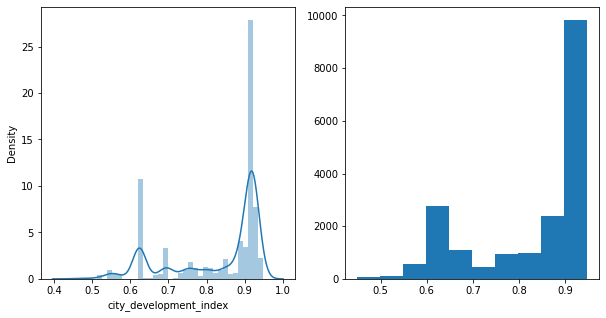

In [70]:
# Visualize data
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(hr['city_development_index'])
plt.subplot(1,2,2)
plt.hist(hr['city_development_index'])
plt.show()

**Comments:** 

1.   Not equally distributed
2.   Mostly in 0.92
3.   Negative skewness
4.   Has an odd local peak at around 0.6







*training_hours*

In [71]:
hr['training_hours'].describe()

count    19158.000000
mean        65.366896
std         60.058462
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64

In [72]:
hr_mode = hr['training_hours'].mode()
hr_mode

0    28
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


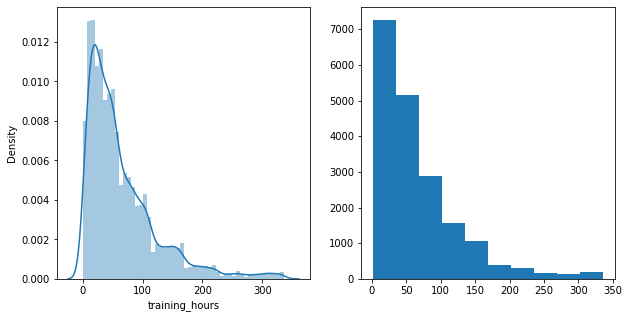

In [73]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(hr['training_hours'])
plt.subplot(1,2,2)
plt.hist(hr['training_hours'])
plt.show()

**Comments:** 

1.   Range is from 0 to 336
2.   Not equally distributed
3.   Mostly have training hours less than a 100.
4.   Positive skewness.





In [74]:
hr[['city_development_index','training_hours','target']].corr()

,city_development_index,training_hours,target
city_development_index,1.000000,0.001920,-0.341665
training_hours,0.001920,1.000000,-0.021577
target,-0.341665,-0.021577,1.000000


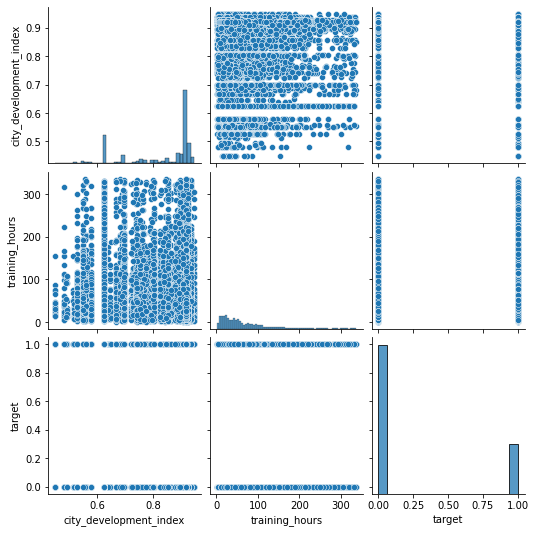

In [75]:
# Continuous & continuous
sns.pairplot(hr[['city_development_index','training_hours','target']])

**Comment:** 
*   No correlation between 'city_development_index' and 'training_hours'
*   'city_development_index' and 'target' have negative correlation
*   No correlation between 'training_hours' and 'target'

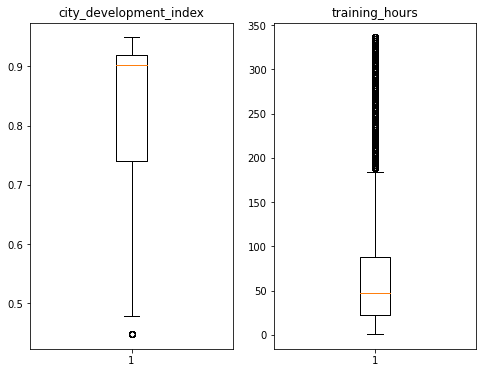

In [76]:
# boxplot of city_development_index & training_hours
plt.figure(figsize=(8,6))
plt.subplot(121)
plt.title('city_development_index')
plt.boxplot(hr['city_development_index'])
plt.subplot(122)
plt.title('training_hours')
plt.boxplot(hr['training_hours'])
plt.show()

### **Comments 3-1:**
*   For variable 'city_development_index': only one outliner at the lower whisker
*   For variable 'training_hour': many ouliners at the upper whisker

*Checking outliners of 'city_development_index'*

In [77]:
Q1 = np.percentile(hr.city_development_index, 25)
Q1

0.74

In [78]:
Q3 = np.percentile(hr.city_development_index, 75)
Q3

0.92

In [79]:
city_development_index_iqr = Q3 - Q1
city_development_index_iqr 

0.18000000000000005

In [80]:
outliner_ratio_1 = len(hr[(hr['city_development_index'] < (Q1 - 1.5*city_development_index_iqr))])/len(hr['city_development_index'])
outliner_percentage_1 = "{:.2%}".format(outliner_ratio_1)
print('Percentage of outliners:',outliner_percentage_1)

Percentage of outliners: 0.09%


In [81]:
hr_new_1 = hr[(hr['city_development_index'] >= (Q1 - 1.5*city_development_index_iqr))]

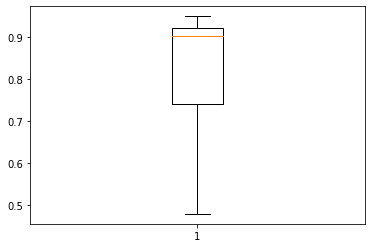

In [82]:
plt.boxplot(hr_new_1['city_development_index'])
plt.show()

In [83]:
hr_new_1.city_development_index.describe()

count    19141.000000
mean         0.829186
std          0.122893
min          0.479000
25%          0.740000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

In [84]:
hr.city_development_index.describe()

count    19158.000000
mean         0.828848
std          0.123362
min          0.448000
25%          0.740000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

### **Comments 3-2:**
*    Percentage of outliners is not significant
*    Outliners don't create statistically significant difference

**-> Consider not to remove outliners**

*Checking outliners of 'training_hours'*

In [85]:
Q1 = np.percentile(hr.training_hours, 25)
Q1

23.0

In [86]:
Q3 = np.percentile(hr.training_hours, 75)
Q3

88.0

In [87]:
training_hours_iqr = Q3 - Q1
training_hours_iqr 

65.0

In [88]:
outliner_ratio = len(hr[(hr['training_hours'] > (Q3 + 1.5*training_hours_iqr ))])/len(hr['training_hours'])
outliner_percentage = "{:.2%}".format(outliner_ratio)
print('Percentage of outliners:',outliner_percentage)

Percentage of outliners: 5.14%


In [89]:
hr_new = hr[(hr['training_hours'] <= (Q3 + 1.5*training_hours_iqr ))]

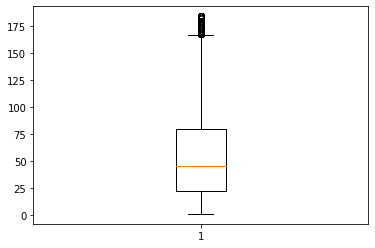

In [90]:
plt.boxplot(hr_new['training_hours'])
plt.show()

In [91]:
hr_new.training_hours.describe()

count    18174.000000
mean        55.499670
std         42.305548
min          1.000000
25%         22.000000
50%         45.000000
75%         80.000000
max        184.000000
Name: training_hours, dtype: float64

In [92]:
hr.training_hours.describe()

count    19158.000000
mean        65.366896
std         60.058462
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64

### **Comments 3-3:**
*    Percentage of outliners is reasonable
*    Outliners don't create statistically significant difference
*    Losing insights from abnormal groups in dataset

**-> Consider not to remove outliners**

*Checking abnormal groups of 'training_hours'*

In [93]:
training_hours_abnormal = hr[(hr['training_hours'] > (Q3 + 1.5*training_hours_iqr ))]
training_hours_abnormal.head(10)

,enrollee_id,city_code,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,work_experience,company_size,company_type,most_recent_job,training_hours,target
35,4866,103,0.920,Male,yes,no_enrollment,Graduate,STEM,7-15,Small,Early Stage Startup,2-3,206,0.0
69,4830,90,0.698,Male,no,no_enrollment,Graduate,Unknown,1-3,Unknown,Pvt Ltd,None,228,1.0
89,32401,103,0.920,Female,yes,no_enrollment,Graduate,STEM,4-7,Medium,Unknown,0-1,332,0.0
110,4789,67,0.855,Male,yes,no_enrollment,Graduate,STEM,7-15,Small,Pvt Ltd,0-1,210,0.0
119,14199,160,0.920,Male,yes,Part time course,Graduate,Business Degree,7-15,Small,Funded Startup,0-1,260,0.0
133,32776,64,0.666,Male,yes,no_enrollment,Graduate,STEM,15+,Unknown,Unknown,4-5,290,0.0
161,13333,75,0.939,Male,yes,no_enrollment,Graduate,STEM,15+,Unknown,Unknown,None,326,0.0
164,4064,160,0.920,Male,yes,no_enrollment,Graduate,STEM,15+,Unknown,Unknown,0-1,198,1.0
176,3024,98,0.949,Male,yes,no_enrollment,Graduate,STEM,15+,Local,Public Sector,0-1,246,0.0
210,7672,21,0.624,Male,yes,no_enrollment,Masters,STEM,0,Small,Pvt Ltd,0-1,202,1.0


In [94]:
training_hours_abnormal.describe()

,enrollee_id,city_development_index,training_hours,target
count,984.000000,984.000000,984.000000,984.000000
mean,16664.973577,0.826756,247.609756,0.213415
std,9685.874593,0.124357,46.481952,0.409926
min,64.000000,0.479000,188.000000,0.000000
25%,7820.750000,0.727000,206.000000,0.000000
50%,16430.500000,0.898500,234.000000,0.000000
75%,24945.750000,0.920000,290.000000,0.000000
max,33370.000000,0.949000,336.000000,1.000000


In [95]:
training_hours_abnormal.describe(include=object)

,city_code,gender,relevent_experience,enrolled_university,education_level,major_discipline,work_experience,company_size,company_type,most_recent_job
count,984,984,984,984,984,984,984,984,984,838
unique,88,3,2,3,5,7,5,7,7,3
top,103,Male,yes,no_enrollment,Graduate,STEM,7-15,Unknown,Pvt Ltd,0-1
freq,218,911,703,713,641,745,300,290,518,432


### **Comments 3-4:**
*    Mean of dataset is 248 hours
*    Compare to normal dataset, the only different variable is 'work_experience' (work experience in abnormal dataset is shorter(7 - 15 years))

**New question: Is there correlation between work experience and training hours?**


In [96]:
work_train = hr.groupby('work_experience')['training_hours'].mean().sort_values(ascending=True)
work_train

work_experience
0       62.505963
1-3     64.706271
15+     64.904478
7-15    65.920836
4-7     65.924759
Name: training_hours, dtype: float64

### **Comments 3-5:**
*    Freshers and Juniors (0 - 3 years) have the least training hours
*    Seniors (4 - 15 years) have the most training hours

##**3.2** **EDA - For categorical variables**

In [97]:
city_count = (hr.groupby('city_code').count())['enrollee_id'].sort_values(ascending=False)
top_10_city = city_count.head(10)
gender_count = (hr.groupby('gender').count())['enrollee_id'].sort_values(ascending=False)
relevant_experience_count = (hr.groupby('relevent_experience').count())['enrollee_id'].sort_values(ascending=False)
university_count = (hr.groupby('enrolled_university').count())['enrollee_id'].sort_values(ascending=False)
education_count = (hr.groupby('education_level').count())['enrollee_id'].sort_values(ascending=False)
major_count = (hr.groupby('major_discipline').count())['enrollee_id'].sort_values(ascending=False)
experience_count = (hr.groupby('work_experience').count())['enrollee_id'].sort_values(ascending=False)
company_size_count = (hr.groupby('company_size').count())['enrollee_id'].sort_values(ascending=False)
company_type_count = (hr.groupby('company_type').count())['enrollee_id'].sort_values(ascending=False)
last_new_job_count = (hr.groupby('most_recent_job').count())['enrollee_id'].sort_values(ascending=False)
print(top_10_city)
print('-'*50)
print(gender_count)
print('-'*50)
print(relevant_experience_count)
print('-'*50)
print(university_count)
print('-'*50)
print(education_count)
print('-'*50)
print(major_count)
print('-'*50)
print(experience_count)
print('-'*50)
print(company_size_count)
print('-'*50)
print(company_type_count)
print('-'*50)
print(last_new_job_count)


city_code
103    4355
21     2702
16     1533
114    1336
160     845
136     586
67      431
75      305
102     304
104     301
Name: enrollee_id, dtype: int64
--------------------------------------------------
gender
Male      17729
Female     1238
Other       191
Name: enrollee_id, dtype: int64
--------------------------------------------------
relevent_experience
yes    13792
no      5366
Name: enrollee_id, dtype: int64
--------------------------------------------------
enrolled_university
no_enrollment       14203
Full time course     3757
Part time course     1198
Name: enrollee_id, dtype: int64
--------------------------------------------------
education_level
Graduate          12058
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: enrollee_id, dtype: int64
--------------------------------------------------
major_discipline
STEM               14492
Unknown             2813
Humanities           669
Other                381
Bus

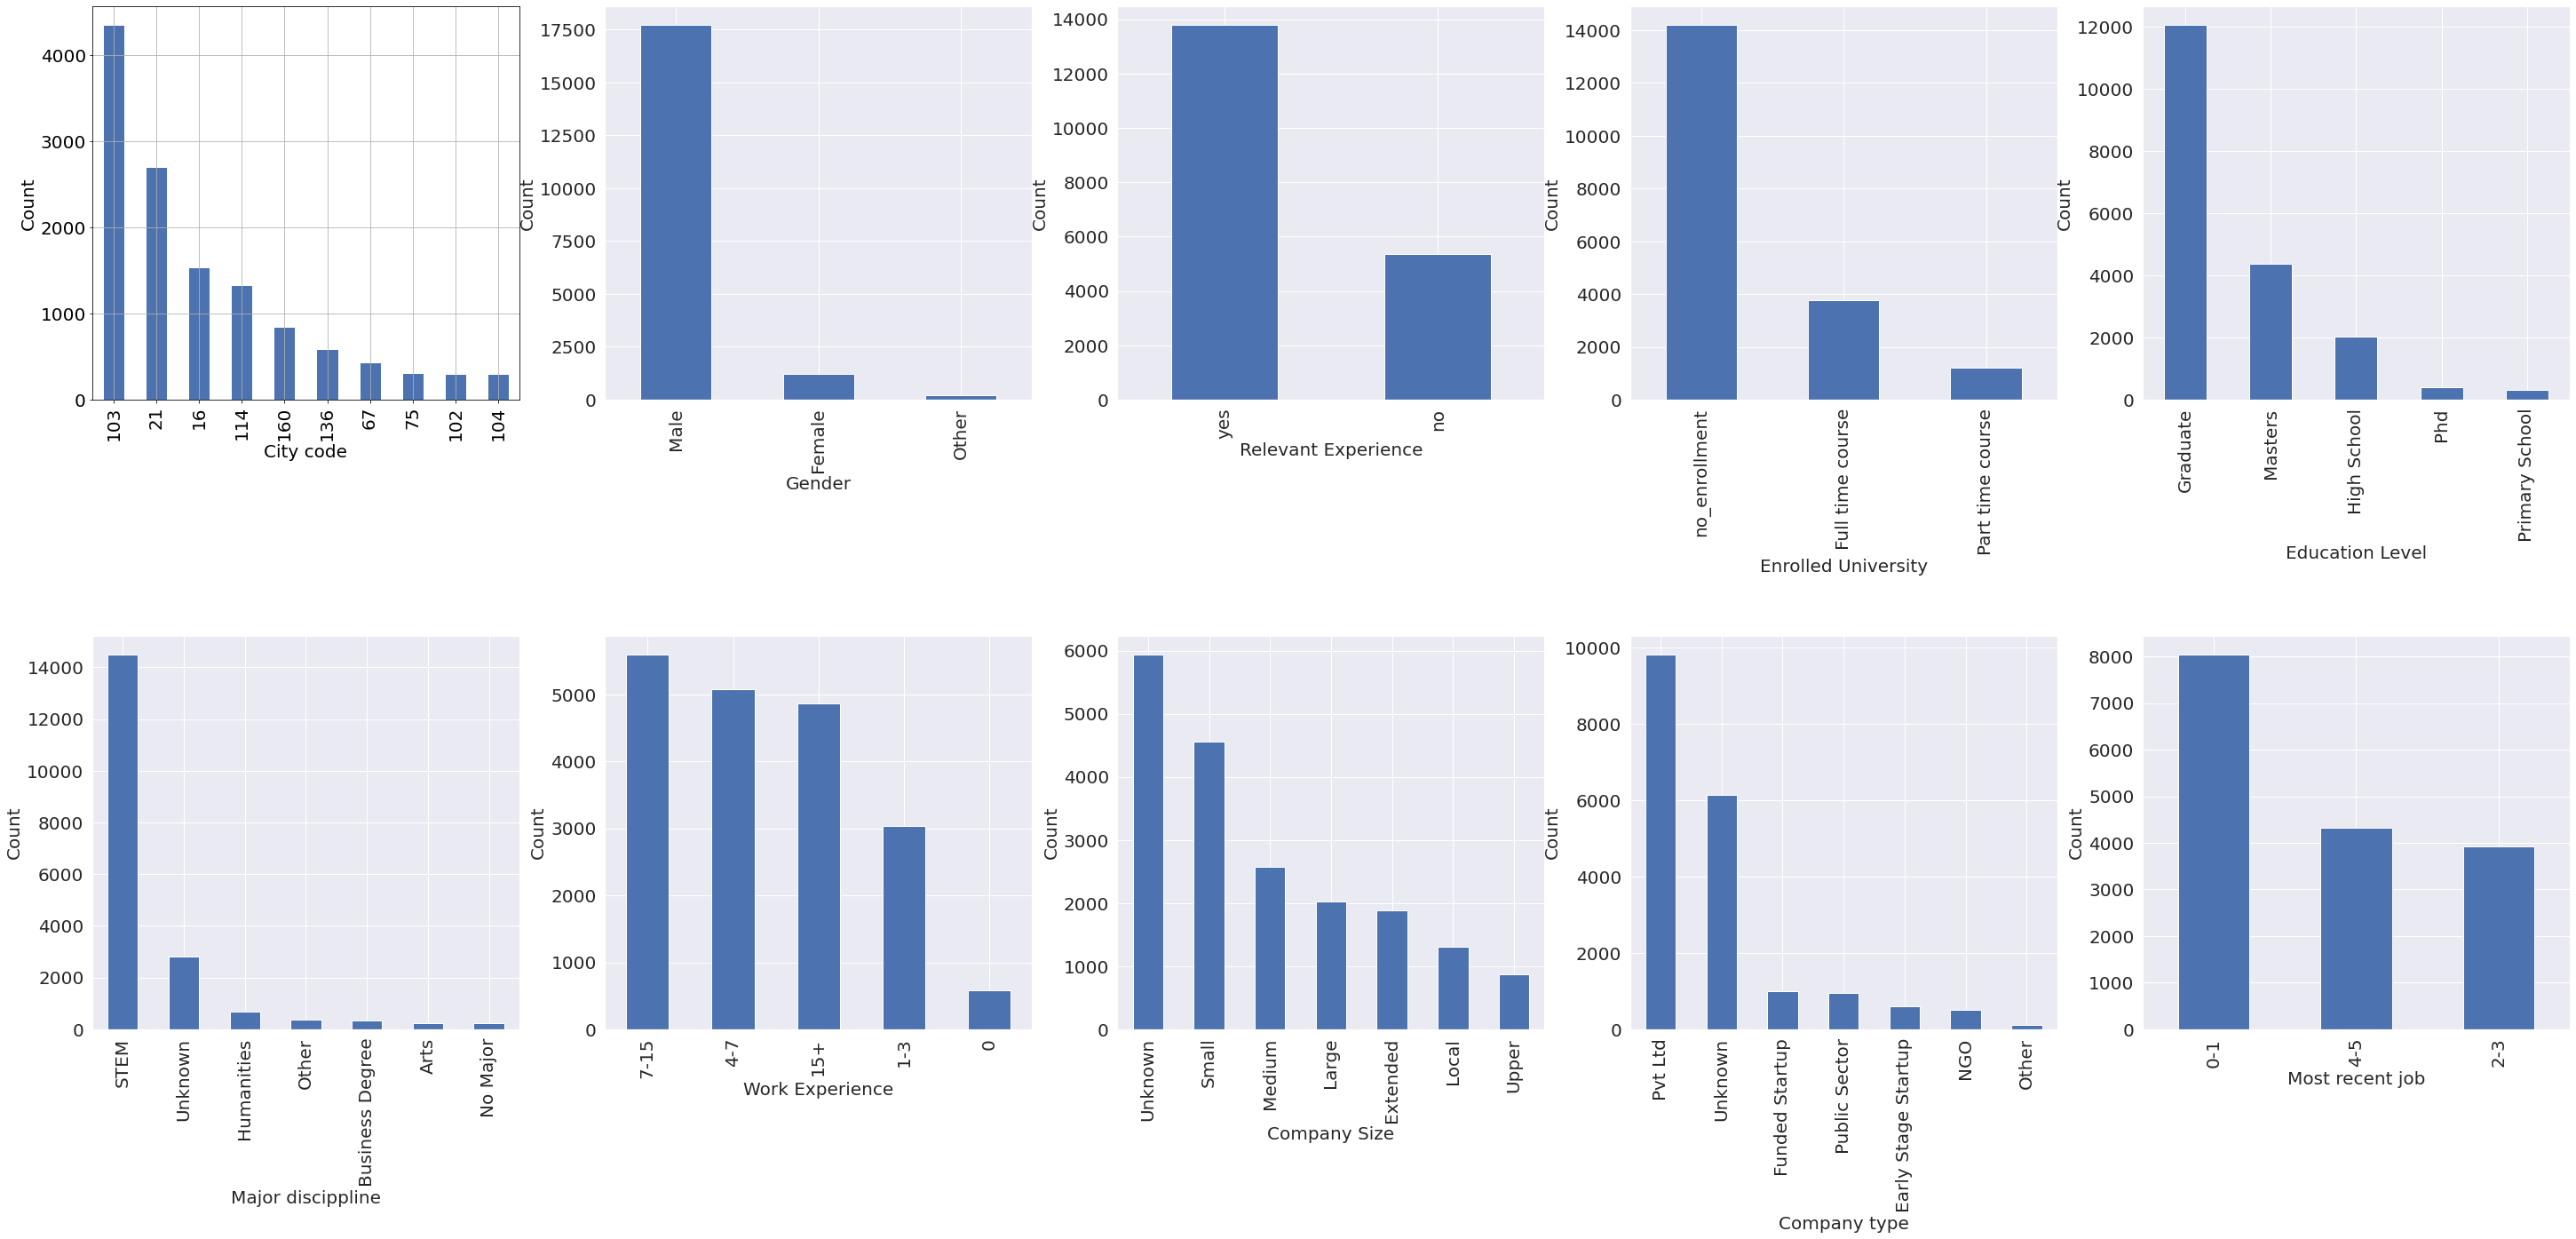

In [98]:
plt.figure(figsize=(50,40))
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0.6)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.subplot(251)
sns.set(style="darkgrid")
top_10_city.plot.bar()
plt.xlabel('City code',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.subplot(252)
sns.set()
gender_count.plot.bar()
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.subplot(253)
sns.set()
relevant_experience_count.plot.bar()
plt.xlabel('Relevant Experience',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.subplot(254)
sns.set()
university_count.plot.bar()
plt.xlabel('Enrolled University',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.subplot(255)
sns.set()
education_count.plot.bar()
plt.xlabel('Education Level',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.subplot(256)
sns.set()
major_count.plot.bar()
plt.xlabel('Major discippline',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.subplot(257)
sns.set()
experience_count.plot.bar()
plt.xlabel('Work Experience',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.subplot(258)
sns.set()
company_size_count.plot.bar()
plt.xlabel('Company Size',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.subplot(259)
sns.set()
company_type_count.plot.bar()
plt.xlabel('Company type',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.subplot(2,5,10)
sns.set()
last_new_job_count.plot.bar()
plt.xlabel('Most recent job',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

*Analyze `target` variable*

In [99]:
target_count = hr.groupby('target').count()['enrollee_id']
target_count

target
0.0    14381
1.0     4777
Name: enrollee_id, dtype: int64

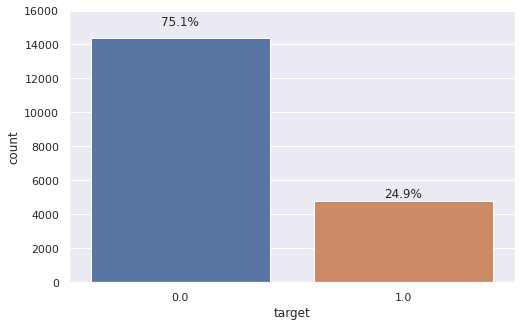

In [100]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,5))
ax = sns.countplot(x="target", data=hr)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(hr.target))
    x = p.get_x() + p.get_width()/2
    y = p.get_height()*1.05
    ax.annotate(percentage, (x, y),ha='center')
plt.ylim(0,16000)
plt.show()

**Comments:** Imbalanced dataset, >75% data is 'target 0' (people who are not looking for a job change to data scientist)

---



*Analyze categorical variables and 'target'*

*Analyze 'gender' and 'target'*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


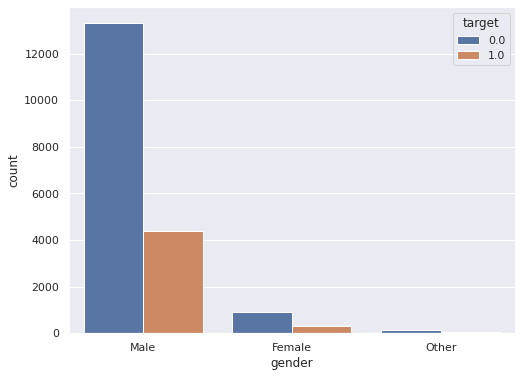

In [101]:
plt.figure(figsize=(8,6))
sns.countplot(hr["gender"], hue = "target", data = hr)
plt.show()

In [102]:
target_gender = hr.groupby(['gender'])['target'].value_counts(normalize=True).unstack()
target_gender

target,0.0,1.0
gender,,
Female,0.736672,0.263328
Male,0.751763,0.248237
Other,0.738220,0.261780


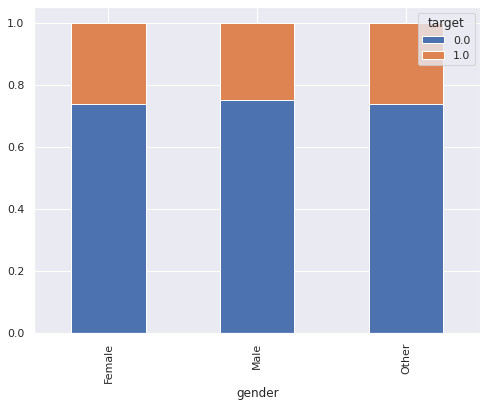

In [103]:
plt.rcParams["figure.figsize"] = [8, 6]
target_gender.plot.bar(stacked=True)
plt.show()

### **Comments 3-6:**
*    Percentage of female want to change their job is more than percentage of male

*Analyze 'relevent_experience' and 'target'*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


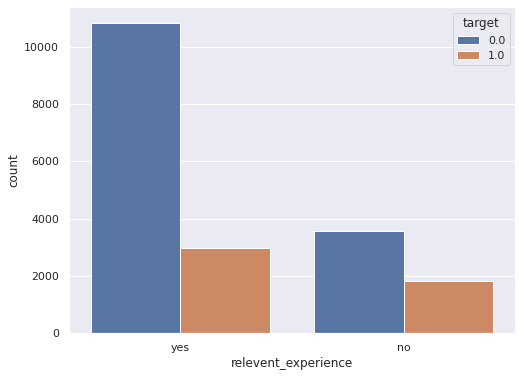

In [104]:
plt.figure(figsize=(8,6))
sns.countplot(hr["relevent_experience"], hue = "target", data = hr)
plt.show()

In [105]:
relevant_experience_target = hr.groupby(['relevent_experience'])['target'].value_counts(normalize=True).unstack()
relevant_experience_target

target,0.0,1.0
relevent_experience,,
no,0.661573,0.338427
yes,0.785310,0.214690


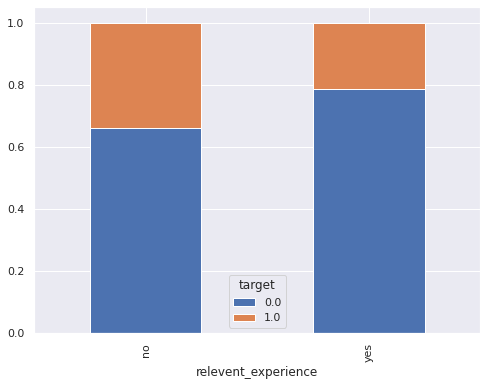

In [106]:
plt.rcParams["figure.figsize"] = [8, 6]
relevant_experience_target.plot.bar(stacked=True)
plt.show()

### **Comments 3-7:**
*    People who have no relevant experience want to change job to data science more than people who have relevant experience

*Analyze 'enrolled_university' and 'target'*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


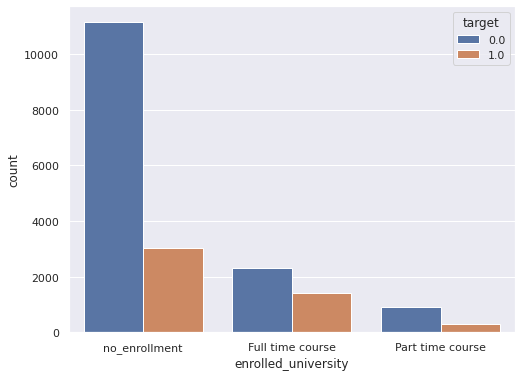

In [107]:
plt.figure(figsize=(8,6))
sns.countplot(hr["enrolled_university"], hue = "target", data = hr)
plt.show()

In [108]:
enrolled_university_target = hr.groupby(['enrolled_university'])['target'].value_counts(normalize=True).unstack()
enrolled_university_target

target,0.0,1.0
enrolled_university,,
Full time course,0.619111,0.380889
Part time course,0.747913,0.252087
no_enrollment,0.785679,0.214321


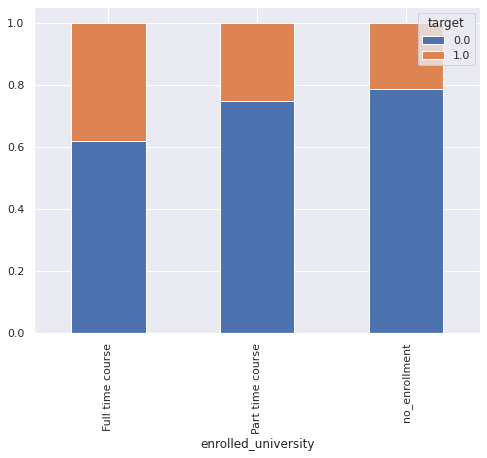

In [109]:
plt.rcParams["figure.figsize"] = [8, 6]
enrolled_university_target.plot.bar(stacked=True)
plt.show()

### **Comments 3-8:**
*    People who enroll for full time course in university is more motivated to change their job to data science than people who don't enroll to any courses or just do part time course

*Analyze 'education_level' and 'target'*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


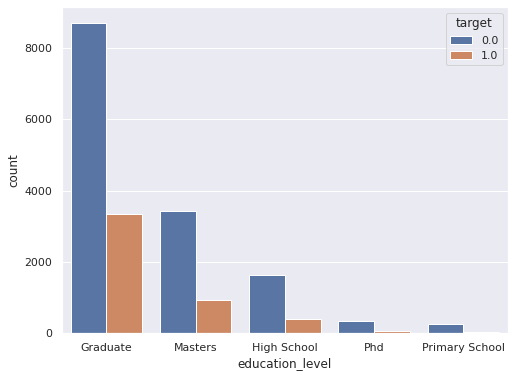

In [110]:
plt.figure(figsize=(8,6))
sns.countplot(hr["education_level"], hue = "target", data = hr)
plt.show()

In [111]:
education_level_target = hr.groupby(['education_level'])['target'].value_counts(normalize=True).unstack()
education_level_target

target,0.0,1.0
education_level,,
Graduate,0.722259,0.277741
High School,0.804660,0.195340
Masters,0.785600,0.214400
Phd,0.859903,0.140097
Primary School,0.866883,0.133117


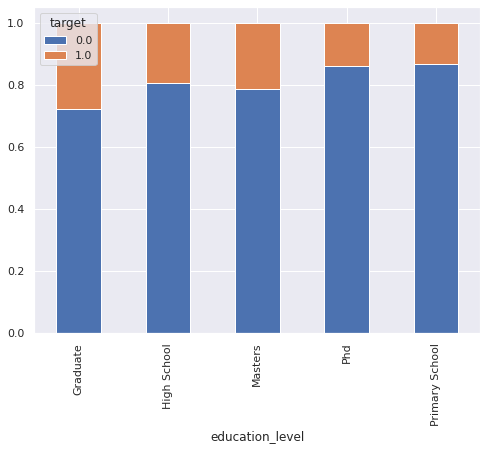

In [112]:
plt.rcParams["figure.figsize"] = [8, 6]
education_level_target.plot.bar(stacked=True)
plt.show()

### **Comments 3-9:**
*    People who finished bachelor are looking for a job change to data science more than others

*Analyze 'major_discipline' and 'target'*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


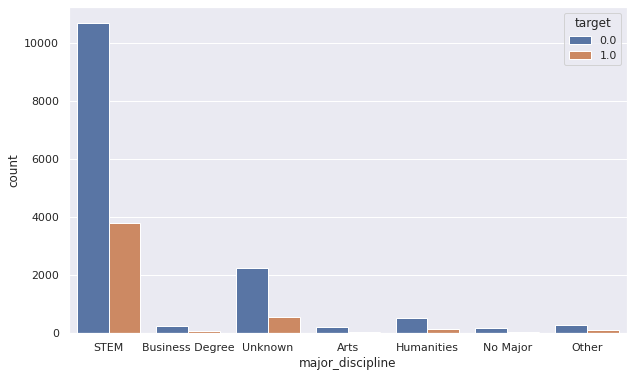

In [113]:
plt.figure(figsize=(10,6))
sns.countplot(hr["major_discipline"], hue = "target", data = hr)
plt.show()

In [114]:
major_discipline_target = hr.groupby(['major_discipline'])['target'].value_counts(normalize=True).unstack()
major_discipline_target

target,0.0,1.0
major_discipline,,
Arts,0.790514,0.209486
Business Degree,0.737003,0.262997
Humanities,0.789238,0.210762
No Major,0.753363,0.246637
Other,0.732283,0.267717
STEM,0.738407,0.261593
Unknown,0.804835,0.195165


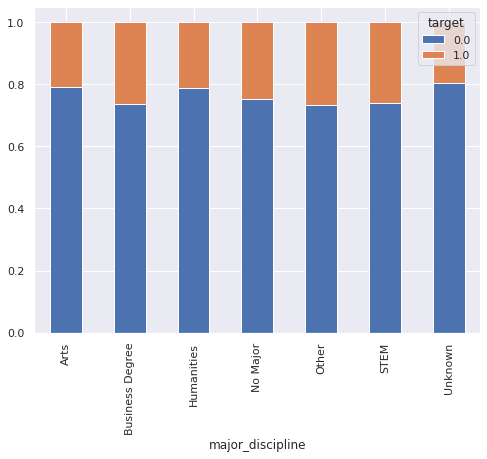

In [115]:
plt.rcParams["figure.figsize"] = [8, 6]
major_discipline_target.plot.bar(stacked=True)
plt.show()

### **Comments 3-10:**
*    People who studied STEM and Business are looking for a job change to data science more than others

*Analyze 'work_experience' and 'target'*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


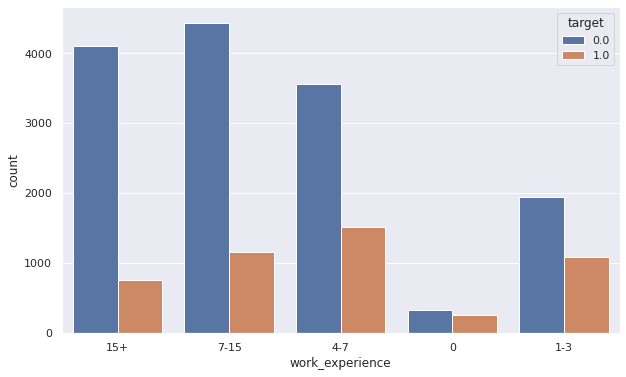

In [116]:
plt.figure(figsize=(10,6))
sns.countplot(hr["work_experience"], hue = "target", data = hr)
plt.show()

In [117]:
work_experience_target = hr.groupby(['work_experience'])['target'].value_counts(normalize=True).unstack()
work_experience_target

target,0.0,1.0
work_experience,,
0,0.557070,0.442930
1-3,0.641914,0.358086
15+,0.843673,0.156327
4-7,0.701595,0.298405
7-15,0.793424,0.206576


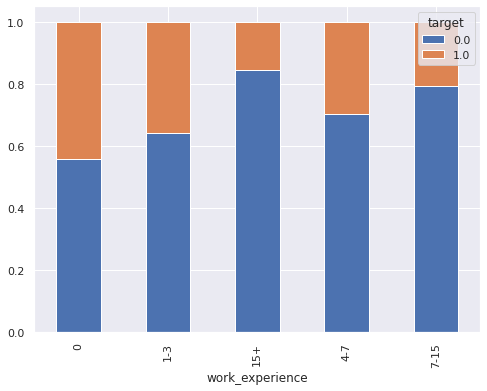

In [118]:
plt.rcParams["figure.figsize"] = [8, 6]
work_experience_target.plot.bar(stacked=True)
plt.show()

### **Comments 3-11:**
*    People who have limited working experience (0 - 3 years) are looking for a job change to data science more than others

*Analyze 'company_size' and 'target'*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


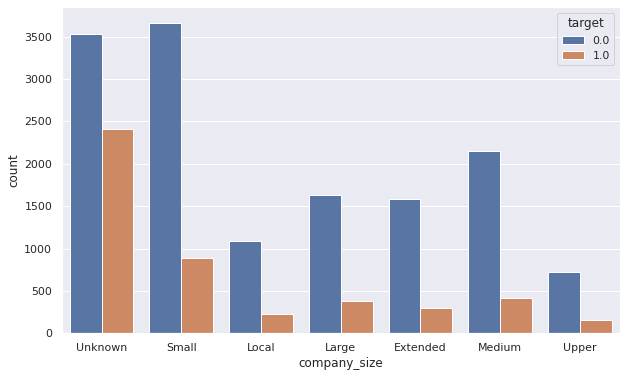

In [119]:
plt.figure(figsize=(10,6))
sns.countplot(hr["company_size"], hue = "target", data = hr)
plt.show()

In [120]:
company_size_target = hr.groupby(['company_size'])['target'].value_counts(normalize=True).unstack()
company_size_target

target,0.0,1.0
company_size,,
Extended,0.840296,0.159704
Large,0.809312,0.190688
Local,0.828746,0.171254
Medium,0.838584,0.161416
Small,0.804787,0.195213
Unknown,0.594139,0.405861
Upper,0.826682,0.173318


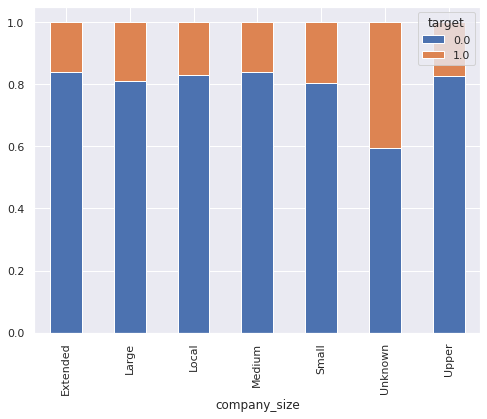

In [121]:
plt.rcParams["figure.figsize"] = [8, 6]
company_size_target.plot.bar(stacked=True)
plt.show()

*Analyze 'company_type' and 'target'*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


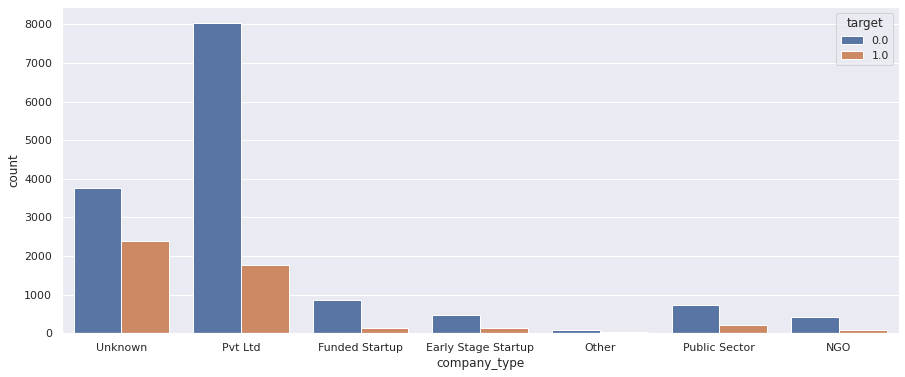

In [122]:
plt.figure(figsize=(15,6))
sns.countplot(hr["company_type"], hue = "target", data = hr)
plt.show()

In [123]:
company_type_target = hr.groupby(['company_type'])['target'].value_counts(normalize=True).unstack()
company_type_target

target,0.0,1.0
company_type,,
Early Stage Startup,0.764511,0.235489
Funded Startup,0.860140,0.139860
NGO,0.813820,0.186180
Other,0.760331,0.239669
Public Sector,0.780105,0.219895
Pvt Ltd,0.819191,0.180809
Unknown,0.611726,0.388274


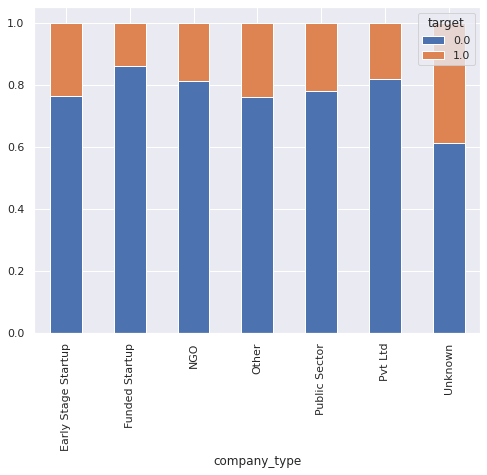

In [124]:
plt.rcParams["figure.figsize"] = [8, 6]
company_type_target.plot.bar(stacked=True)
plt.show()

### **Comments 3-12:**
*    People who worked in public sector and early stage startup are looking for a job change to data science more than others

*Analyze 'last_new_job' and 'target'*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


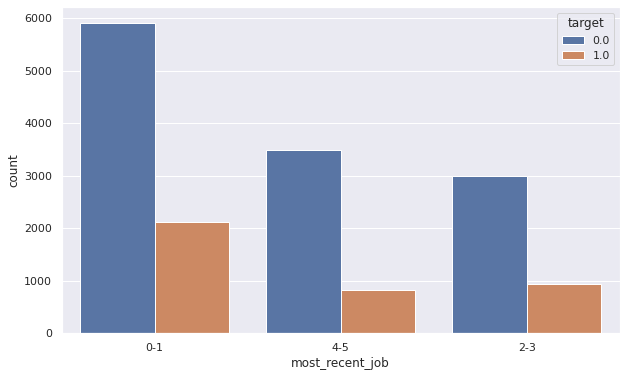

In [125]:
plt.figure(figsize=(10,6))
sns.countplot(hr["most_recent_job"], hue = "target", data = hr)
plt.show()

In [126]:
most_recent_job_target = hr.groupby(['most_recent_job'])['target'].value_counts(normalize=True).unstack()
most_recent_job_target

target,0.0,1.0
most_recent_job,,
0-1,0.735697,0.264303
2-3,0.762742,0.237258
4-5,0.808289,0.191711


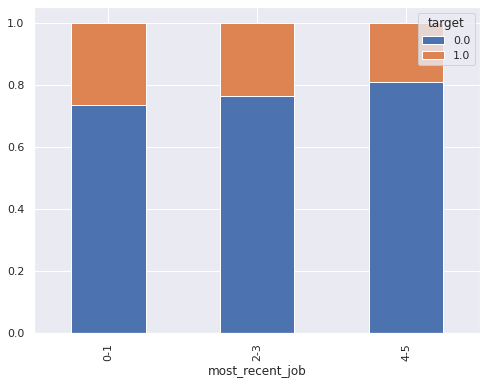

In [127]:
plt.rcParams["figure.figsize"] = [8, 6]
most_recent_job_target.plot.bar(stacked=True)
plt.show()

### **Comments 3-13:**
*    People who spent a short time (0 - 1 year) in their most recent job are looking for a job change to data science more than others

*Analyze 'training_hours' and 'target'*

In [128]:
training_hours_target = hr.groupby('target')['training_hours'].mean()
training_hours_target

target
0.0    66.113761
1.0    63.118484
Name: training_hours, dtype: float64

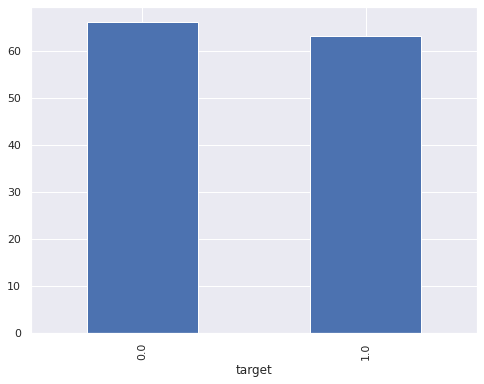

In [129]:
plt.rcParams["figure.figsize"] = [8, 6]
training_hours_target.plot.bar()
plt.show()

### **Comments3-14:**
*    People who are looking for job change to data science spent average 63 training hours

*Analyze 'city_development_index' and 'target'*

In [130]:
city_development_target = hr.groupby('target')['city_development_index'].mean()
city_development_target

target
0.0    0.853139
1.0    0.755719
Name: city_development_index, dtype: float64

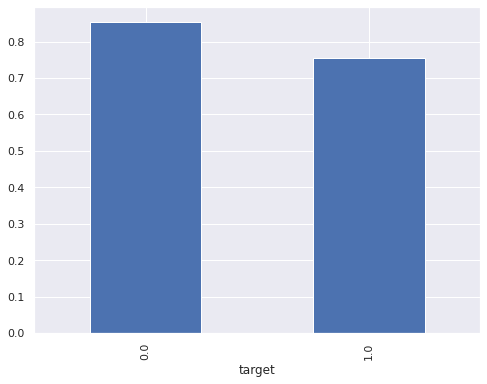

In [131]:
plt.rcParams["figure.figsize"] = [8, 6]
city_development_target.plot.bar()
plt.show()

### **Comments 3-15:**
*    People who are looking for job change to data science come from city with lower development index (0.75)

### **EXTRA** **Data Standardization**

In [132]:
hr['training_hours_log'] = np.log(hr['training_hours'])

In [133]:
hr.head()

,enrollee_id,city_code,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,work_experience,company_size,company_type,most_recent_job,training_hours,target,training_hours_log
0,8949,103,0.920,Male,yes,no_enrollment,Graduate,STEM,15+,Unknown,Unknown,0-1,36,1.0,3.583519
1,29725,40,0.776,Male,no,no_enrollment,Graduate,STEM,7-15,Small,Pvt Ltd,4-5,47,0.0,3.850148
2,11561,21,0.624,Male,no,Full time course,Graduate,STEM,4-7,Unknown,Unknown,None,83,0.0,4.418841
3,33241,115,0.789,Male,no,no_enrollment,Graduate,Business Degree,0,Unknown,Pvt Ltd,None,52,1.0,3.951244
4,666,162,0.767,Male,yes,no_enrollment,Masters,STEM,15+,Small,Funded Startup,4-5,8,0.0,2.079442


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


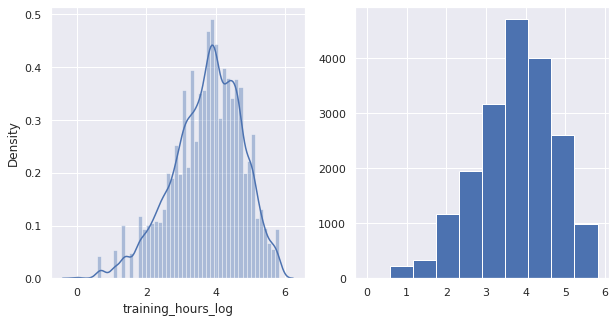

In [134]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(hr['training_hours_log'])
plt.subplot(1,2,2)
plt.hist(hr['training_hours_log'])
plt.show()

In [135]:
# Use RobustScaler for variable "city_development_index"
# CODE HERE
# Import sklearn

In [136]:
hr

,enrollee_id,city_code,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,work_experience,company_size,company_type,most_recent_job,training_hours,target,training_hours_log
0,8949,103,0.920,Male,yes,no_enrollment,Graduate,STEM,15+,Unknown,Unknown,0-1,36,1.0,3.583519
1,29725,40,0.776,Male,no,no_enrollment,Graduate,STEM,7-15,Small,Pvt Ltd,4-5,47,0.0,3.850148
2,11561,21,0.624,Male,no,Full time course,Graduate,STEM,4-7,Unknown,Unknown,None,83,0.0,4.418841
3,33241,115,0.789,Male,no,no_enrollment,Graduate,Business Degree,0,Unknown,Pvt Ltd,None,52,1.0,3.951244
4,666,162,0.767,Male,yes,no_enrollment,Masters,STEM,15+,Small,Funded Startup,4-5,8,0.0,2.079442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,173,0.878,Male,no,no_enrollment,Graduate,Humanities,7-15,Unknown,Unknown,0-1,42,1.0,3.737670
19154,31398,103,0.920,Male,yes,no_enrollment,Graduate,STEM,7-15,Unknown,Unknown,4-5,52,1.0,3.951244
19155,24576,103,0.920,Male,yes,no_enrollment,Graduate,STEM,15+,Small,Pvt Ltd,4-5,44,0.0,3.784190
19156,5756,65,0.802,Male,yes,no_enrollment,High School,Unknown,0,Upper,Pvt Ltd,2-3,97,0.0,4.574711
